<a href="https://colab.research.google.com/github/rgmantovani/advancedML/blob/master/codes/aula_04_rnns_lstm/LSTM_example2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uso de Deep Learning para Séries Temporais (LSTMs)

Disciplina: Métodos e Modelos Avançados em Ciência de Dados

Especialização em Ciência de Dados - Universidade Tecnologica Federal do Paraná

Aula 04: RNNs e LSTMs

Exemplo 02: Executando LSTM para série temporal univariada (airline-passengers)

---

In [23]:
# importando as bibliotecas necessárias para rodar o script

# manipulação de números de ponto flutuante
import numpy as np

# plotagem de gráficos
import matplotlib.pyplot as plt

# criação manipulação de data frames
import pandas as pd

# funções matemáticas
import math

# criação dos modelos de DL
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# preprocessador - escalar os dados
from sklearn.preprocessing import MinMaxScaler

# metrica de desempenho (MSE)
from sklearn.metrics import mean_squared_error

In [25]:
# definir um seed para reprodução dos experimentos
numpy.random.seed(42)

In [24]:
# funcao auxiliar para criar os itervalos de previsao
# é a mesma que usamos no exemplo anterior
def create_dataset(dataset, janela_previsao=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-janela_previsao-1):
        a = dataset[i:(i+janela_previsao), 0]
        dataX.append(a)
        dataY.append(dataset[i + janela_previsao, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [26]:
# obter dataset --> https://github.com/jbrownlee/Datasets
# Exemplo: shampoo, venda de shampoos ao longo de três anos

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
dataframe = pd.read_csv(url, usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# vislumbrar um pedaço dos dados e formato lido
print("\n* Dimensão dos dados:", dataset.shape) 
# 36 amostras/instâncias, univariadas (um único valor real)
print("* Dados originais:")
print(dataset[:10])


* Dimensão dos dados: (144, 1)
* Dados originais:
[[112.]
 [118.]
 [132.]
 [129.]
 [121.]
 [135.]
 [148.]
 [148.]
 [136.]
 [119.]]


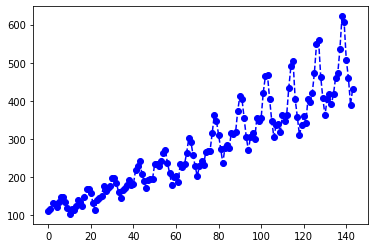

In [27]:
# plotar os dados para visualizar a nossa time series
plt.plot(dataset, linestyle='--', marker='o', color='b')

In [28]:
# Normalizando os dados

# escalar os dados no intervalo [0,1] usando sklearn
# from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

print("* Dados escalados:")
print(dataset[:10].transpose())

* Dados escalados:
[[0.01544401 0.02702703 0.05405405 0.04826255 0.03281853 0.05984557
  0.08494207 0.08494207 0.06177607 0.02895753]]


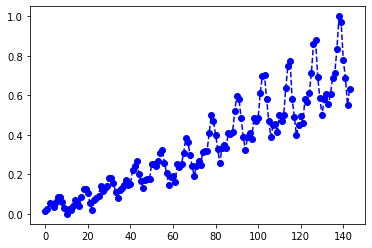

In [29]:
# visualizar nossos dados escalados
# Obs: prestar atenção ao eixo Y, agora varia entre [0, +1]
plt.plot(dataset, linestyle='--', marker='o', color='b')

In [30]:
# Ajustando conjunto de treino e teste
# 85% dos exemplos no treino, 15% no teste
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size

#print(train_size, test_size)
print("- Numero de instâncias treino: ", train_size)
print("- Numero de instâncias teste: ", test_size)

- Numero de instâncias treino:  96
- Numero de instâncias teste:  48


In [31]:
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Conjunto de treinamento - amostras de 0-95
# Conjunto de teste - amostras de 96-143
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print("* Conjunto de Treinamento:", train.shape)
#print(train)

print("* Conjunto de Teste:", test.shape)
#print(test)


* Conjunto de Treinamento: (96, 1)
* Conjunto de Teste: (48, 1)


In [32]:
# reshape em X=t and Y=t+1
# isto é, criando dados no padrão DF = [X|Y]
# para cada X, o Y = X+1

janela_previsao = 1
trainX, trainY = create_dataset(train, janela_previsao)

# vendo o nosso conjunto de treinamento
print("DF = [X | X+1]")
np.column_stack((trainX, trainY))


DF = [X | X+1]


array([[0.01544401, 0.02702703],
       [0.02702703, 0.05405405],
       [0.05405405, 0.04826255],
       [0.04826255, 0.03281853],
       [0.03281853, 0.05984557],
       [0.05984557, 0.08494207],
       [0.08494207, 0.08494207],
       [0.08494207, 0.06177607],
       [0.06177607, 0.02895753],
       [0.02895753, 0.        ],
       [0.        , 0.02702703],
       [0.02702703, 0.02123553],
       [0.02123553, 0.04247104],
       [0.04247104, 0.07142857],
       [0.07142857, 0.05984557],
       [0.05984557, 0.04054055],
       [0.04054055, 0.08687258],
       [0.08687258, 0.12741312],
       [0.12741312, 0.12741312],
       [0.12741312, 0.10424709],
       [0.10424709, 0.05598456],
       [0.05598456, 0.01930502],
       [0.01930502, 0.06949806],
       [0.06949806, 0.07915059],
       [0.07915059, 0.08880308],
       [0.08880308, 0.14285713],
       [0.14285713, 0.11389962],
       [0.11389962, 0.13127413],
       [0.13127413, 0.14285713],
       [0.14285713, 0.18339768],
       [0.

In [33]:
# reshape em X=t and Y=t+1 para o conjunto de teste
testX, testY  = create_dataset(test, janela_previsao)
print("Conjunto de Teste no formato supervisionado:")
print(testX)
print("Conjunto de Teste no formato supervisionado:")
print(testY)
print("\nDF = [X | X+1]")
np.column_stack((testX, testY))


Conjunto de Teste no formato supervisionado:
[[0.4073359 ]
 [0.3803089 ]
 [0.48648646]
 [0.47104248]
 [0.484556  ]
 [0.6138996 ]
 [0.6969112 ]
 [0.70077217]
 [0.57915056]
 [0.46911195]
 [0.38803086]
 [0.44787642]
 [0.45559844]
 [0.4131274 ]
 [0.4980695 ]
 [0.47104248]
 [0.49999997]
 [0.6389961 ]
 [0.7471043 ]
 [0.7741313 ]
 [0.57915056]
 [0.492278  ]
 [0.3976834 ]
 [0.44980696]
 [0.49420848]
 [0.45945945]
 [0.5830116 ]
 [0.5637065 ]
 [0.61003864]
 [0.71042466]
 [0.8571429 ]
 [0.8783784 ]
 [0.69305015]
 [0.5849421 ]
 [0.4980695 ]
 [0.58108103]
 [0.6042471 ]
 [0.554054  ]
 [0.60810804]
 [0.6891892 ]
 [0.71042466]
 [0.8320464 ]
 [1.        ]
 [0.96911204]
 [0.7799227 ]
 [0.6891892 ]]
Conjunto de Teste no formato supervisionado:
[0.3803089  0.48648646 0.47104248 0.484556   0.6138996  0.6969112
 0.70077217 0.57915056 0.46911195 0.38803086 0.44787642 0.45559844
 0.4131274  0.4980695  0.47104248 0.49999997 0.6389961  0.7471043
 0.7741313  0.57915056 0.492278   0.3976834  0.44980696 0.49420848

array([[0.4073359 , 0.3803089 ],
       [0.3803089 , 0.48648646],
       [0.48648646, 0.47104248],
       [0.47104248, 0.484556  ],
       [0.484556  , 0.6138996 ],
       [0.6138996 , 0.6969112 ],
       [0.6969112 , 0.70077217],
       [0.70077217, 0.57915056],
       [0.57915056, 0.46911195],
       [0.46911195, 0.38803086],
       [0.38803086, 0.44787642],
       [0.44787642, 0.45559844],
       [0.45559844, 0.4131274 ],
       [0.4131274 , 0.4980695 ],
       [0.4980695 , 0.47104248],
       [0.47104248, 0.49999997],
       [0.49999997, 0.6389961 ],
       [0.6389961 , 0.7471043 ],
       [0.7471043 , 0.7741313 ],
       [0.7741313 , 0.57915056],
       [0.57915056, 0.492278  ],
       [0.492278  , 0.3976834 ],
       [0.3976834 , 0.44980696],
       [0.44980696, 0.49420848],
       [0.49420848, 0.45945945],
       [0.45945945, 0.5830116 ],
       [0.5830116 , 0.5637065 ],
       [0.5637065 , 0.61003864],
       [0.61003864, 0.71042466],
       [0.71042466, 0.8571429 ],
       [0.

In [34]:
# Ajustando os conjunto de treino (trainX) e teste (testX) para o formato
# [samples, time_steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
print("- Dim train:", trainX.shape)
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("- Dim test:  ", testX.shape)

print("Teste no formato para input:") #alternativamente poderíamos ter amostras multivariadas
print(testX)

- Dim train: (94, 1, 1)
- Dim test:   (46, 1, 1)
Teste no formato para input:
[[[0.4073359 ]]

 [[0.3803089 ]]

 [[0.48648646]]

 [[0.47104248]]

 [[0.484556  ]]

 [[0.6138996 ]]

 [[0.6969112 ]]

 [[0.70077217]]

 [[0.57915056]]

 [[0.46911195]]

 [[0.38803086]]

 [[0.44787642]]

 [[0.45559844]]

 [[0.4131274 ]]

 [[0.4980695 ]]

 [[0.47104248]]

 [[0.49999997]]

 [[0.6389961 ]]

 [[0.7471043 ]]

 [[0.7741313 ]]

 [[0.57915056]]

 [[0.492278  ]]

 [[0.3976834 ]]

 [[0.44980696]]

 [[0.49420848]]

 [[0.45945945]]

 [[0.5830116 ]]

 [[0.5637065 ]]

 [[0.61003864]]

 [[0.71042466]]

 [[0.8571429 ]]

 [[0.8783784 ]]

 [[0.69305015]]

 [[0.5849421 ]]

 [[0.4980695 ]]

 [[0.58108103]]

 [[0.6042471 ]]

 [[0.554054  ]]

 [[0.60810804]]

 [[0.6891892 ]]

 [[0.71042466]]

 [[0.8320464 ]]

 [[1.        ]]

 [[0.96911204]]

 [[0.7799227 ]]

 [[0.6891892 ]]]


In [35]:
# Criando nossa rede recorrente com unidades de LSTM 
# formato keras sequencial
model = Sequential()
model.add(LSTM(units=4, input_shape=(1, janela_previsao))) 
model.add(Dense(1))

# visualizar o modelo (arquitetura) que geramos
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [36]:
# parâmetros para otimizacao
# medida a ser minimizada = Erro quadrático médio (Mean Squared Error)
# Otimizador, algoritmo de treinamento = Adam
# métricas para avaliar o modelo = MSE, RMSE, MAE
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=["MeanSquaredError", "RootMeanSquaredError", "MeanAbsoluteError"]
) 

In [37]:
# Treinando nossa rede
# epocas = 100
# batch_size = 1, treinar amostra por amostra
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 1s - loss: 0.0488 - mean_squared_error: 0.0488 - root_mean_squared_error: 0.2210 - mean_absolute_error: 0.1725
Epoch 2/100
94/94 - 0s - loss: 0.0251 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1585 - mean_absolute_error: 0.1220
Epoch 3/100
94/94 - 0s - loss: 0.0174 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1319 - mean_absolute_error: 0.1045
Epoch 4/100
94/94 - 0s - loss: 0.0154 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1242 - mean_absolute_error: 0.1021
Epoch 5/100
94/94 - 0s - loss: 0.0144 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1200 - mean_absolute_error: 0.0987
Epoch 6/100
94/94 - 0s - loss: 0.0135 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1160 - mean_absolute_error: 0.0957
Epoch 7/100
94/94 - 0s - loss: 0.0126 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1123 - mean_absolute_error: 0.0931
Epoch 8/100
94/94 - 0s - loss: 0.0117 - mean_squared_error: 0.0117 - root_mean_squa

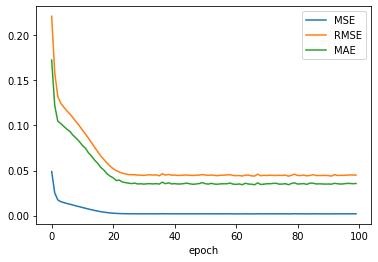

In [38]:
# Plotando os erros obtidos no conjunto de treinamento
# plotamos as três medidas (MSE, RMSE, MAE)
# percebam que depois de 20 épocas, não há uma redução significativa nos erros, 
#e o treinamento poderia ser feito com uma quantidade menor de iterações

# checar os nomes
#print(history.history.keys())

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])
plt.xlabel('epoch')
plt.legend(['MSE', 'RMSE', 'MAE'], loc='upper right')
plt.show()

In [39]:
# Realizando as predições nos conjuntos de treino/teste

# predição no conjunto de trienamento
trainPredict = model.predict(trainX)

# predição no conjunto de teste
testPredict  = model.predict(testX)

In [40]:
print("Predição do Teste:")
print(testPredict)

print("\nDF = [Real | Predito]")
np.column_stack((testY, testPredict))

Predição do Teste:
[[0.40707055]
 [0.3817637 ]
 [0.47908464]
 [0.46530098]
 [0.47736913]
 [0.5872908 ]
 [0.6522838 ]
 [0.65520054]
 [0.5587843 ]
 [0.46356845]
 [0.38902715]
 [0.44437417]
 [0.45138258]
 [0.41244984]
 [0.48933172]
 [0.46530098]
 [0.49103174]
 [0.6074015 ]
 [0.689477  ]
 [0.70886   ]
 [0.5587843 ]
 [0.4842179 ]
 [0.39806998]
 [0.44612935]
 [0.4859247 ]
 [0.45487458]
 [0.56198955]
 [0.54586947]
 [0.5841614 ]
 [0.6624517 ]
 [0.76565367]
 [0.7795357 ]
 [0.64935756]
 [0.5635887 ]
 [0.48933172]
 [0.5603881 ]
 [0.5794493 ]
 [0.5377217 ]
 [0.58259296]
 [0.6464219 ]
 [0.6624517 ]
 [0.7489122 ]
 [0.85421985]
 [0.83600974]
 [0.7129556 ]
 [0.6464219 ]]

DF = [Real | Predito]


array([[0.3803089 , 0.40707055],
       [0.48648646, 0.3817637 ],
       [0.47104248, 0.47908464],
       [0.484556  , 0.46530098],
       [0.6138996 , 0.47736913],
       [0.6969112 , 0.5872908 ],
       [0.70077217, 0.6522838 ],
       [0.57915056, 0.65520054],
       [0.46911195, 0.5587843 ],
       [0.38803086, 0.46356845],
       [0.44787642, 0.38902715],
       [0.45559844, 0.44437417],
       [0.4131274 , 0.45138258],
       [0.4980695 , 0.41244984],
       [0.47104248, 0.48933172],
       [0.49999997, 0.46530098],
       [0.6389961 , 0.49103174],
       [0.7471043 , 0.6074015 ],
       [0.7741313 , 0.689477  ],
       [0.57915056, 0.70886   ],
       [0.492278  , 0.5587843 ],
       [0.3976834 , 0.4842179 ],
       [0.44980696, 0.39806998],
       [0.49420848, 0.44612935],
       [0.45945945, 0.4859247 ],
       [0.5830116 , 0.45487458],
       [0.5637065 , 0.56198955],
       [0.61003864, 0.54586947],
       [0.71042466, 0.5841614 ],
       [0.8571429 , 0.6624517 ],
       [0.

In [41]:
# Aplicando a inversa da escala para retornar ao valor original
# training set
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

# testing set
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [42]:
print("\n * Predição do Teste na escala original:")
print(testPredict.shape)
print(testPredict)

#print("\nDF = [Real | Predito]")
#np.column_stack((testY, testPredict))

print("\n * Predição do Teste na escala original:")
print(testY.shape)
print(testY)


 * Predição do Teste na escala original:
(46, 1)
[[314.86255]
 [301.75357]
 [352.16586]
 [345.02594]
 [351.27722]
 [408.21667]
 [441.883  ]
 [443.3939 ]
 [393.4503 ]
 [344.12845]
 [305.51605]
 [334.18582]
 [337.8162 ]
 [317.64902]
 [357.47382]
 [345.02594]
 [358.35443]
 [418.63397]
 [461.1491 ]
 [471.18948]
 [393.4503 ]
 [354.8249 ]
 [310.20023]
 [335.095  ]
 [355.70898]
 [339.62506]
 [395.11057]
 [386.76038]
 [406.59558]
 [447.15   ]
 [500.6086 ]
 [507.79953]
 [440.36722]
 [395.93896]
 [357.47382]
 [394.281  ]
 [404.15472]
 [382.53986]
 [405.78314]
 [438.84653]
 [447.15   ]
 [491.93652]
 [546.4859 ]
 [537.05304]
 [473.31097]
 [438.84653]]

 * Predição do Teste na escala original:
(1, 46)
[[301.00001152 355.999993   348.00001085 355.00000681 421.9999924
  465.0000161  466.99998848 403.99999397 346.99999379 304.99998716
  335.99999132 339.99999783 317.99999288 362.00000277 348.00001085
  362.99998896 434.99999813 491.00002756 505.00001948 403.99999397
  359.00001333 310.00001073 337.00

In [43]:
# Calculando RMSE no treino e teste
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Teste Score: %.2f RMSE' % (testScore))

Treino: 22.81 RMSE
Teste Score: 49.12 RMSE


In [44]:
# Ajustando o plot do treino
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[janela_previsao:len(trainPredict)+janela_previsao, :] = trainPredict
print(trainPredictPlot)

[[       nan]
 [123.50462 ]
 [128.645   ]
 [140.90193 ]
 [138.24591 ]
 [131.24127 ]
 [143.5733  ]
 [155.3156  ]
 [155.3156  ]
 [144.4671  ]
 [129.50854 ]
 [116.76341 ]
 [128.645   ]
 [126.066   ]
 [135.60562 ]
 [148.96027 ]
 [143.5733  ]
 [134.72911 ]
 [156.22939 ]
 [175.72093 ]
 [175.72093 ]
 [164.51547 ]
 [141.79071 ]
 [125.210236]
 [148.05844 ]
 [152.58293 ]
 [157.14459 ]
 [183.27751 ]
 [169.16397 ]
 [177.6041  ]
 [183.27751 ]
 [203.36853 ]
 [203.36853 ]
 [188.98387 ]
 [168.23187 ]
 [153.49234 ]
 [171.96736 ]
 [176.662   ]
 [185.17616 ]
 [197.5967  ]
 [186.12683 ]
 [188.03069 ]
 [221.75807 ]
 [233.42192 ]
 [245.09122 ]
 [213.03012 ]
 [195.67772 ]
 [177.6041  ]
 [198.55714 ]
 [200.47992 ]
 [200.47992 ]
 [239.25754 ]
 [238.28496 ]
 [232.44937 ]
 [246.06311 ]
 [266.41574 ]
 [274.12558 ]
 [240.23004 ]
 [214.96745 ]
 [185.17616 ]
 [205.29706 ]
 [208.19357 ]
 [192.80446 ]
 [238.28496 ]
 [230.50441 ]
 [237.31238 ]
 [266.41574 ]
 [302.6954  ]
 [294.19046 ]
 [261.5827  ]
 [232.44937 ]
 [207.

In [45]:
# Ajustando o plot do teste
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(janela_previsao*2)+1:len(dataset)-1, :] = testPredict
print(testPredictPlot)

[[      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]

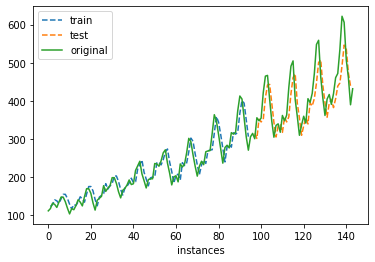

In [48]:
# Ajustando o plot com o sinal original
# - verde   = dataset original
# - azul    = predicoes geradas no conjunto de treinamento
# - laranja = predicoes geradas no conjunto de teste

plt.plot(trainPredictPlot, linestyle="--")
plt.plot(testPredictPlot, linestyle="--")
plt.plot(scaler.inverse_transform(dataset))
plt.xlabel('instances')
plt.legend(['train', 'test', 'original'], loc='upper left')
plt.show()